<a href="https://colab.research.google.com/github/hamednasr/Computer-Vision-with-Python/blob/main/Human_Action_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries:

In [ ]:
!pip install mediapipe

     |████████████████████████████████| 32.7 MB 1.3 MB/s 


In [ ]:
import cv2
import numpy as np
import mediapipe as mp
import os
import time
import matplotlib.pyplot as plt

# keypoints using mediapipe holistic:

In [ ]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [ ]:
def mediapipe_detection(image,model):
  results = model.process(image)
  return image, results

In [ ]:
def draw_landmarks(img,results):
  mp_drawing.draw_landmarks(img, 
                            results.face_landmarks,
                            mp_holistic.FACEMESH_TESSELATION,
                            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=1),
                            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=1, circle_radius=1))
  
  mp_drawing.draw_landmarks(img, 
                            results.pose_landmarks,
                            mp_holistic.POSE_CONNECTIONS,
                            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=1),
                            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=1, circle_radius=1))
  
  mp_drawing.draw_landmarks(img, 
                            results.right_hand_landmarks,
                            mp_holistic.HAND_CONNECTIONS,
                            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=1),
                            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 200, 55), thickness=1, circle_radius=1))
  
  mp_drawing.draw_landmarks(img, 
                            results.left_hand_landmarks,
                            mp_holistic.HAND_CONNECTIONS,
                            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=1),
                            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 55, 200), thickness=1, circle_radius=1))

In [ ]:
cap = cv2.VideoCapture(0)

#initiate holistic model:
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
      ret, frame = cap.read()
      # recolor feed
      
      # img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      # make detections
      frame, results = mediapipe_detection(frame,holistic)
      # print(results.face_landmarks)  
    
      # recoloring image back to BGR for rendering
      # img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
      
      #face detetction
      draw_landmarks(frame,results)
      
      cv2.imshow('Webcam Feed', frame)

      if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

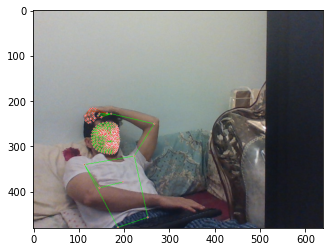

In [ ]:
plt.imshow(img)

In [ ]:
type(results.left_hand_landmarks)

mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList

In [ ]:
results.face_landmarks

landmark {
  x: 0.27771884202957153
  y: 0.6080195903778076
  z: -0.014215730130672455
}
landmark {
  x: 0.2809769809246063
  y: 0.5873051881790161
  z: -0.019998647272586823
}
landmark {
  x: 0.2766340970993042
  y: 0.5956624150276184
  z: -0.012165633030235767
}
landmark {
  x: 0.2732779383659363
  y: 0.571326494216919
  z: -0.014469357207417488
}
landmark {
  x: 0.2809866964817047
  y: 0.5815286040306091
  z: -0.020544253289699554
}
landmark {
  x: 0.279044508934021
  y: 0.5752049088478088
  z: -0.01802128553390503
}
landmark {
  x: 0.27285653352737427
  y: 0.5607839226722717
  z: -0.005387964658439159
}
landmark {
  x: 0.23687946796417236
  y: 0.5631768107414246
  z: -0.004705494269728661
}
landmark {
  x: 0.2706061601638794
  y: 0.5495040416717529
  z: -0.000859237217810005
}
landmark {
  x: 0.27049076557159424
  y: 0.5422982573509216
  z: -0.00025428907247260213
}
landmark {
  x: 0.2670290768146515
  y: 0.5171975493431091
  z: 0.008422513492405415
}
landmark {
  x: 0.277674496173

In [ ]:
results

mediapipe.python.solution_base.SolutionOutputs

In [ ]:
len(results.face_landmarks.landmark)

468

In [ ]:
468*3

1404

In [ ]:
results.face_landmarks.landmark

[x: 0.27771884202957153
y: 0.6080195903778076
z: -0.014215730130672455
, x: 0.2809769809246063
y: 0.5873051881790161
z: -0.019998647272586823
, x: 0.2766340970993042
y: 0.5956624150276184
z: -0.012165633030235767
, x: 0.2732779383659363
y: 0.571326494216919
z: -0.014469357207417488
, x: 0.2809866964817047
y: 0.5815286040306091
z: -0.020544253289699554
, x: 0.279044508934021
y: 0.5752049088478088
z: -0.01802128553390503
, x: 0.27285653352737427
y: 0.5607839226722717
z: -0.005387964658439159
, x: 0.23687946796417236
y: 0.5631768107414246
z: -0.004705494269728661
, x: 0.2706061601638794
y: 0.5495040416717529
z: -0.000859237217810005
, x: 0.27049076557159424
y: 0.5422982573509216
z: -0.00025428907247260213
, x: 0.2670290768146515
y: 0.5171975493431091
z: 0.008422513492405415
, x: 0.27767449617385864
y: 0.6108562350273132
z: -0.014018124900758266
, x: 0.27708524465560913
y: 0.6134104132652283
z: -0.013028363697230816
, x: 0.27613598108291626
y: 0.6148165464401245
z: -0.011609552428126335
, 

In [ ]:
np.array([[r.x,r.y,r.z,r.visibility] for r in results.pose_landmarks.landmark]).flatten() \
if results.pose_landmarks else np.zeros(33*4)

array([ 0.26542154,  0.57383543,  0.05146815,  0.99994582,  0.26989013,
        0.55011052,  0.10021099,  0.99980265,  0.2764754 ,  0.54986042,
        0.10027029,  0.99980861,  0.28267094,  0.54971611,  0.10013618,
        0.99971032,  0.24881729,  0.55210012,  0.08063288,  0.99993235,
        0.24082012,  0.55340803,  0.08068737,  0.99995059,  0.232669  ,
        0.55473429,  0.08052228,  0.99995774,  0.28356892,  0.5616051 ,
        0.29085833,  0.99979252,  0.21572416,  0.57058245,  0.19973302,
        0.99998558,  0.2782585 ,  0.60169929,  0.1181517 ,  0.99982655,
        0.25272867,  0.60367393,  0.09110333,  0.99992234,  0.34935269,
        0.67041618,  0.28350332,  0.99924117,  0.17789675,  0.70837975,
        0.16548519,  0.99872673,  0.4176963 ,  0.52235204,  0.02098664,
        0.98999429,  0.22880074,  0.81573164,  0.24296924,  0.90005183,
        0.26890427,  0.47659487, -0.09927812,  0.8796519 ,  0.31059209,
        0.78899002,  0.14467698,  0.561607  ,  0.22933535,  0.47

In [ ]:
def extract_keypoints(results):
    pose = np.array([[r.x,r.y,r.z,r.visibility] for r in results.pose_landmarks.landmark]) if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[r.x,r.y,r.z] for r in results.face_landmarks.landmark]) if results.face_landmarks else np.zeros(468*3)
    right_hand = np.array([[r.x,r.y,r.z] for r in results.right_hand_landmarks.landmark]) if results.right_hand_landmarks else np.zeros(21*3)
    left_hand = np.array([[r.x,r.y,r.z] for r in results.left_hand_landmarks.landmark]) if results.left_hand_landmarks else np.zeros(21*3)